In [1]:
from urllib.request import Request, urlopen
from urllib.error import URLError,HTTPError
from bs4 import BeautifulSoup
import requests
from	wordcloud import	WordCloud
from	konlpy.tag import	Okt
from	collections	import	Counter
import	matplotlib.pyplot as	plt
import	platform

In [2]:
url='https://medium.com/daangn/marketing/home'
html=requests.get(url) 
soup=BeautifulSoup(html.text,'html.parser')
# print(soup)
urllist=[]
for page in soup.select('a.u-block'):
    url=f'{page["href"]}'
    html=requests.get(url)
    bs = BeautifulSoup(html.text, 'html.parser')
    urllist.append(url)
    print(url)
    print(type(url))

https://medium.com/daangn/%ED%81%B0-%EC%9E%A5%EB%B0%94%EA%B5%AC%EB%8B%88-%EB%AA%A8%EC%97%AC%EB%B4%90%EC%9A%94-%EB%8B%B9%EA%B7%BC%EC%9D%98-%EC%88%B2-27cae769f677?source=collection_category---4------0-----------------------
<class 'str'>
https://medium.com/daangn/%EC%82%AC%EC%9A%A9%EC%9E%90%EC%99%80-%ED%95%A8%EA%BB%98%ED%95%98%EB%8A%94-%EB%8B%B9%EA%B7%BC%EB%A7%88%EC%BC%93-%EB%A7%88%EC%BC%80%ED%8C%85-%EC%9D%B4%EC%95%BC%EA%B8%B0-50b7acf58dc1?source=collection_category---4------1-----------------------
<class 'str'>
https://medium.com/daangn/%EB%8B%B9%EC%8B%A0%EC%9D%98-%EA%B8%B0%EC%96%B5%EC%97%90-%EC%98%A4%EB%9E%98-%EB%82%A8%EA%B3%A0-%EC%8B%B6%EC%96%B4%EC%9A%94-%EC%8A%A4%ED%83%80%ED%8A%B8%EC%97%85-%EB%84%A4%EC%9D%B4%EB%B0%8D-%EC%9D%B4%EC%95%BC%EA%B8%B0-45929924ea12?source=collection_category---4------2-----------------------
<class 'str'>
https://medium.com/daangn/%ED%92%8B%EB%82%B4%EA%B8%B0-%EC%B0%BD%EC%97%85%EC%9E%90%EC%9D%98-%EC%8A%A4%ED%83%80%ED%8A%B8%EC%97%85-%EC%B0%BD%EC%97%85%ED%95%9

In [3]:
text_dan=[]
for i in range(len(urllist)):
    html=requests.get(urllist[i])
    bs = BeautifulSoup(html.text, 'html.parser')
    result=bs.text.replace('\n','').split(' ')
    
    for i in result:
        text_dan.append(i)
print(text_dan)

['큰', '장바구니,', '모여봐요', '당근의', '숲', '🌳.', '찬', '바람', '쌩쌩', '부는', '12월,', '당근마켓', '구성원들이', '추위를', '뚫고', '당근…', '|', 'by', '당근마켓', '|', '당근마켓', '팀블로그', '|', 'Dec,', '2022', '|', 'MediumPublished', 'in당근마켓', '팀블로그당근마켓FollowDec', '29,', '2022·4', 'min', 'read큰', '장바구니,', '모여봐요', '당근의', '숲', '🌳찬', '바람', '쌩쌩', '부는', '12월,', '당근마켓', '구성원들이', '추위를', '뚫고', '당근', '사무실에', '삼삼오오', '모여들기', '시작했어요.', '당근마켓', '구성원을', '위한', '‘미니', '팝업&포토존’이', '열렸거든요!왕', '커진', '당근마켓', '큰', '장바구니에,', '당근마켓', '구성원들은', '어떤', '물건과', '마음을', '담았을까요?', '생생한', '후기를', '공개합니다.장바구니의', '시작은', '바야흐로…‘당근이세요?’', '라는', '유행어가', '시작하던', '때로', '거슬러', '올라가요.', '당근마켓', '동네', '이웃들이', '거래를', '나왔다가', '서로', '‘당근…이세요?’라고', '외치면서', '유행어처럼', '되었는데요.', '그', '안에서', '‘거래하러', '온', '당근', '사람들이', '서로를', '알아볼', '수', '있으면', '좋겠다’는', '유저들의', '목소리를', '발견할', '수', '있었어요.', '이런', '니즈를', '반영해', '동네', '생활에', '필요한', '물건을', '담을', '수', '있는', '장바구니가', '탄생했고요.2021년', '초', '처음', '모습을', '드러낸', '당근마켓', '장바구니이', '장바구니는', '판매를', '목적으로', '만들어진', '게', '아니었던', '터라', '일부만', '

In [7]:
def	make_wordcloud(word_count,	title_list):
    okt =	Okt()
    sentences_tag =	[]
    #	형태소 분석하여 리스트에 넣기
    for	sentence	in	title_list:
        morph	=	okt.pos(sentence)
        sentences_tag.append(morph)
    noun_adj_list =	[]
    for	sentence1	in	sentences_tag:
        for	word,	tag	in	sentence1:
            if	tag	== 'Noun':
                if word not in ['당근','수','때','이','세트','더','명','그','것','저희','수가','안','해','당신','때문','위','도','판교','예','빈','도수','만','뭐','알',
                '이세','후','가장','통해','분','편','하나','내','총','사무실','존','를','개','앞','대해','번','화','아래','료','숲','등','정도','볼','은','날','수십','대한']:
                    noun_adj_list.append(word)
    #	형태소별 count
    counts	=	Counter(noun_adj_list)
    tags	=	counts.most_common(word_count)
    # 폰트
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    wc =	WordCloud(font_path=path,	background_color='white',	width=800,	height=600)
    print(dict(tags))
    cloud	=	wc.generate_from_frequencies(dict(tags))
    print(dict(tags).keys)
    plt.figure(figsize=(10,	8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

{'광고': 99, '마켓': 94, '페북': 38, '팀': 30, '도달': 29, '동네': 25, '장바구니': 21, '블로그': 20, '사용자': 20, '지역': 20, '비용': 20, '이름': 19, '규칙': 19, '노출': 17, '이웃': 16, '마케팅': 16, '연결': 15, '이야기': 14, '서비스': 14, '앱': 14, '거래': 13, '시작': 12, '설치': 12, '우리': 11, '범위': 11, '자동': 11, '근처': 10, '설정': 10, '최대': 10, '스타트업': 9, '일': 9, '평균': 9, '마음': 8, '경험': 8, '진행': 8, '간의': 8, '창업': 8, '예산': 8, '구성원': 7, '사람': 7, '확인': 7, '캠페인': 7, '기능': 7, '장터': 7, '비': 7, '관리': 7, '단가': 7, '기억': 6, '고민': 6, '교류': 6, '사회': 6, '위드유': 6, '메뉴': 6, '선택': 6, '특정': 6, '빈도': 6, '생활': 5, '다시': 5, '중고': 5, '바로': 5, '동안': 5, '가치': 5, '이미지': 5, '의미': 5, '관리자': 5, '포스팅': 5, '하루': 5, '포토': 4, '유저': 4, '개선': 4, '사용': 4, '공유': 4, '지금': 4, '생각': 4, '협업': 4, '참여': 4, '이유': 4, '풋내기': 4, '자의': 4, '기간': 4, '팝업': 3, '물건': 3, '후기': 3, '모습': 3, '판매': 3, '수도': 3, '위해': 3, '최근': 3, '더욱': 3, '직접': 3, '자전거': 3, '감동': 3, '커뮤니티': 3, '공감': 3, '실제': 3, '바이럴': 3, '에피소드': 3, '지향': 3, '모두': 3, '밍': 3}
<built-in method keys of dict object at 0x0000012F185

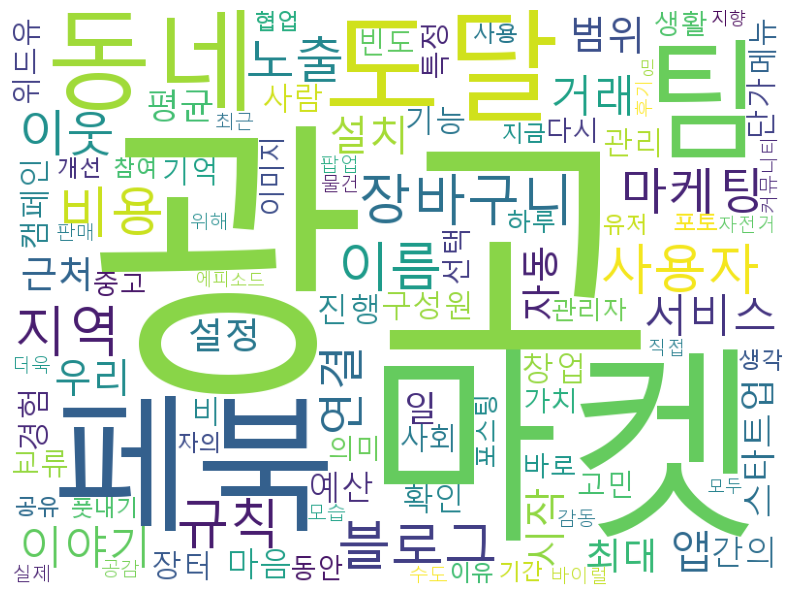

In [8]:
make_wordcloud(100,text_dan)


In [16]:
def	make_wordcloud(word_count,title_list):
    okt =	Okt()
    sentences_tag =	[]
    #	형태소 분석하여 리스트에 넣기
    for	sentence	in	title_list:
        morph	=	okt.pos(sentence)
        sentences_tag.append(morph)
    print(sentences_tag)
    noun_adj_list =	[]
    for	sentence1	in	sentences_tag:
        for	word,	tag	in	sentence1:
            if	tag	== 'Noun':
                if word not in ['당근','수','때','이','세트','더','명','그','것','저희','수가','안','해','당신','때문','위','도','판교','예','빈','도수','만','뭐','알',
                '이세','후','가장','통해','분','편','하나','내','총','사무실','존','를','개','앞','대해','번','화','아래','료','숲','등','정도','볼','은','날','수십','대한']:
                    noun_adj_list.append(word)
    print(tag)
    print(noun_adj_list)
    #	형태소별 count
    counts	=	Counter(noun_adj_list)
    tags	=	counts.most_common(word_count)
    # 폰트
    if	platform.system()	==	'Windows':
        path	=	r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()	==	'Darwin':		
        path	=	r'/System/Library/Fonts/AppleGothic'
    else:
        path	=	r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    wc =	WordCloud(font_path=path,	background_color='white',	width=800,	height=600)
    print(dict(tags))
    cloud	=	wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10,	8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [15]:
make_wordcloud(text_dan)

Alpha
